# Billboard Example

### Import the data

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# this allows plots to appear directly in the notebook
%matplotlib inline

# Read csv using pandas
input_data = pd.read_csv('billboardpricing_demo.csv')

input_data.head()

,LOCATION QUALITY,DAILY IMPRESSIONS,WEEKS UNOCCUPIED,LABEL
0,Medium,76470,13,6231
1,Medium,76471,8,4725
2,High,107313,3,28834
3,Medium,66973,7,17337
4,Low,35079,11,7587


### Analyze the data

/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


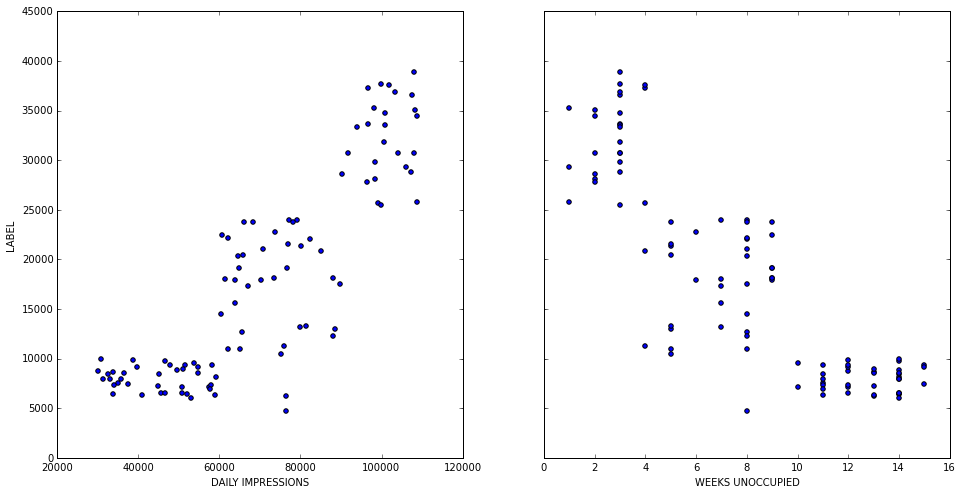

In [35]:
# visualize the relationship between the features and the response using scatterplots

fig, axs = plt.subplots(1, 2, sharey=True)
input_data.plot(kind='scatter', x='DAILY IMPRESSIONS', y='LABEL', ax=axs[0], figsize=(16, 8))
input_data.plot(kind='scatter', x='WEEKS UNOCCUPIED', y='LABEL', ax=axs[1])

### Convert categorical features to numeric

In [36]:
dummies = pd.get_dummies(input_data['LOCATION QUALITY'])

# Now that we have categoricals, delete the 'Location' column from input_data
del input_data['LOCATION QUALITY']

# concatentate the dummy vars with the numerical values
final = pd.concat([dummies, input_data], axis=1)

#final = final.as_matrix()
print("Data shape:", final.shape) # (m,n - m rows, n columns)

# df.convert_objects(convert_numeric=True)
# final = final.convert_objects(convert_numeric=True)

print("Final data types ", final.dtypes)
final.head()

Data shape: (100, 6)
Final data types  High                 float64
Low                  float64
Medium               float64
DAILY IMPRESSIONS      int64
WEEKS UNOCCUPIED       int64
LABEL                  int64
dtype: object


,High,Low,Medium,DAILY IMPRESSIONS,WEEKS UNOCCUPIED,LABEL
0,0,0,1,76470,13,6231
1,0,0,1,76471,8,4725
2,1,0,0,107313,3,28834
3,0,0,1,66973,7,17337
4,0,1,0,35079,11,7587


/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


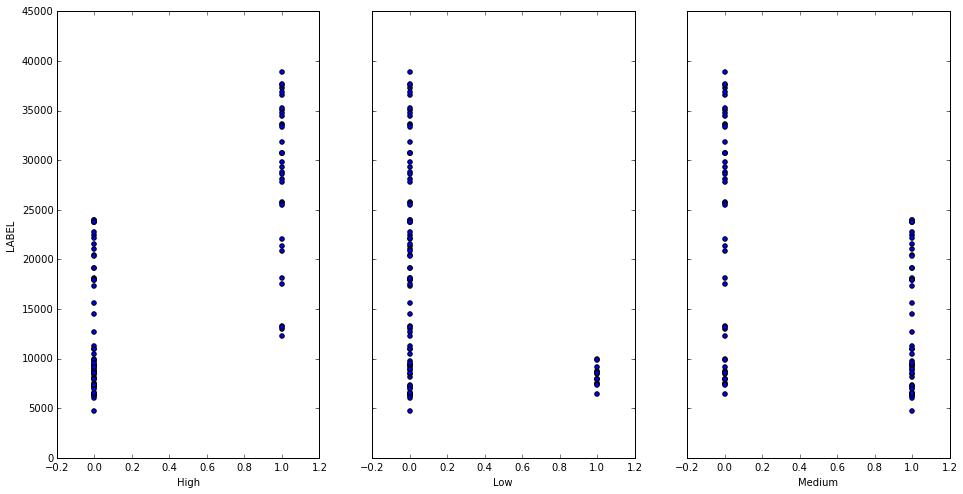

In [37]:
# PLOT Categoricals

fig, axs = plt.subplots(1, 3, sharey=True)
final.plot(kind='scatter', x='High', y='LABEL', ax=axs[0], figsize=(16, 8))
final.plot(kind='scatter', x='Low', y='LABEL', ax=axs[1])
final.plot(kind='scatter', x='Medium', y='LABEL', ax=axs[2])
#input_data.plot(kind='scatter', x='% 4-WEEK PERIODS OCCUPIED', y='LABEL', ax=axs[1])

### Perform some predictions

In [38]:
# construct a linear model
from sklearn import linear_model

# randomly assign train and test
np.random.seed(0)
indices = np.random.permutation(len(final))

# get last column for label
final_label = final['LABEL'].values

# In general, if you have a categorical feature with k levels, you create k-1 dummy variables.
final_data = final.drop(['High', 'LABEL'], axis=1).as_matrix()
# final_data = final.drop('LABEL', axis=1).as_matrix()

# get column names
final_columns = final.drop(['High', 'LABEL'], axis=1).columns
# final_columns = final.drop('LABEL', axis=1).columns

# TRAINING SET
final_data_train = final_data[indices[:-len(final)*.3]]
final_label_train = final_label[indices[:-len(final)*.3]]

# TEST SET
final_data_test = final_data[indices[-len(final)*.3:]]
final_label_test = final_label[indices[-len(final)*.3:]]

# FIT THE MODEL
regr = linear_model.LinearRegression()
regr.fit(final_data_train, final_label_train)

# PREDICT
regr.predict(final_data_test)

# ASSESS
print("Score (R^2): ", regr.score(final_data_test, final_label_test), "\n")
print("Predicted values", regr.predict(final_data_test), "\n")

print("Coefficients: ", list(zip(final_columns, regr.coef_)))

Score (R^2):  0.801809750643 

Predicted values [ 27673.89756483  22434.5332253   28499.72398519  14853.93930016
  30531.15943158  10258.60012599  17445.58140259   7977.93673177
   6972.09178161  17091.40000361   5879.11623068   6132.76191117
  20714.33355572   4488.37074395  22106.92874621  27628.53830154
   9029.95198631   6638.79260433  21928.18251403  15429.71454052
  29489.48430702   9169.93803953   8813.90693679   8787.69135372
   8847.16844346  21563.81346608  33050.51429833   5296.1776492
   7444.24001707  30600.79313591] 

Coefficients:  [('Low', 7189.9921156951759), ('Medium', 1191.9274351133699), ('DAILY IMPRESSIONS', 0.30718818182301089), ('WEEKS UNOCCUPIED', -849.17272217585094)]


/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:21: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:25: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Score (R^2):  0.801809750643 

Predicted values [ 27673.89756483  22434.53322529  28499.72398518  14853.93930016
  30531.15943158  10258.60012599  17445.58140258   7977.93673177
   6972.09178162  17091.40000361   5879.11623069   6132.76191118
  20714.33355573   4488.37074396  22106.92874622  27628.53830154
   9029.95198632   6638.79260434  21928.18251402  15429.71454052
  29489.48430702   9169.93803953   8813.9069368    8787.69135373
   8847.16844346  21563.81346609  33050.51429832   5296.17764921
   7444.24001708  30600.79313591] 

Coefficients:  [('High', -1191.9274350927953), ('Low', 5998.0646805672422), ('DAILY IMPRESSIONS', 0.3071881818223538), ('WEEKS UNOCCUPIED', -849.17272217584969)]


/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/josephreis/.virtualenvs/data/lib/python3.4/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
